# Verlet Integration & Bezier Curves

In [1]:
import numpy as np
from matplotlib.pyplot import *
from IPython.display import set_matplotlib_formats

In [12]:
%matplotlib inline
set_matplotlib_formats('svg')
rcParams['figure.constrained_layout.use'] = True

We try and solve time-dependant acceleration problems using verlet integration, and using a bezier formulation to approximate the solution between physics time steps. The verlet method gives:

$
\begin{align}
x_{n+1} &= x_n + v_n\Delta t + \dfrac{1}{2}a_n{\Delta t}^2 \\
v_{n+1} &= v_n + \dfrac{1}{2}\left(a_n + a_{n+1}\right){\Delta t}
\end{align}
$

We replace $\Delta t$ with $h t_0$:

$
\begin{equation}
x_{n+1} = x_n + (v_n h)t_0 + \dfrac{1}{2}(a_n h^2){t_0}^2
\end{equation}
$

Then, given the bezier curve equation:

$
\begin{align}
B(t_0) &= (1-t_0)^2 b_0 + t_0 (1 - t_0) b_1 + {t_0}^2 b_2 \\
&= a_0 + a_1 t_0 + a_2 {t_0}^2,
\end{align}
$

We then use:

$
\begin{equation}
\begin{bmatrix} b_0\\b_1\\b_2 \end{bmatrix} = %
\begin{bmatrix} 1 & 0 & 0\\ 1 & \frac{1}{2} & 0\\ 1 & 1 & 1 \end{bmatrix} %
\begin{bmatrix} r_n\\v_n h\\ \frac{1}{2} a_n h^2 \end{bmatrix}
\end{equation}
$

which gives:

$
\begin{align}
b_0 &= x_n\\
b_1 &= x_n + \frac{1}{2} v_n h\\
b_2 &= x_n + v_n h + \frac{1}{2} a_n h^2
\end{align}
$

And we can use this to extract values in between time steps

In [17]:
k = 1.0
m = 1.0
h = 0.8

num_periods = 3
omega = np.sqrt(k/m)
period = 2 * np.pi / omega
num_steps = int(num_periods * period / h) + 1

x = np.ones(num_steps)
v = np.zeros(num_steps)
a = np.zeros(num_steps)
b = np.zeros(num_steps)
t = np.arange(0.0, num_steps) * h

# set the initial conditions
x[0] = 1.0
v[0] = 0.0
a[0] = -k*x[0]/m

for n in range(0, num_steps-1):
    x[n+1] = x[n] + v[n]*h + 0.5*a[n]*(h**2)
    a[n+1] = -k*x[n+1]/m
    v[n+1] = v[n] + 0.5*h*(a[n] + a[n+1])
    b[n] = x[n] + 0.5 * v[n]*h
b[-1] = x[-1] + 0.5 * v[-1]*h

Text(0, 0.5, 'x-position')

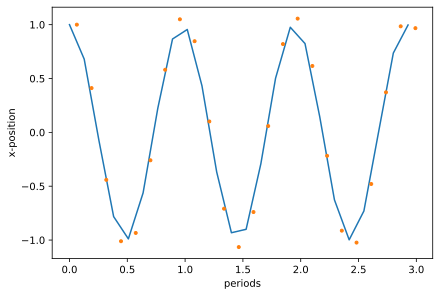

In [18]:
figure()
plot(t/period, x, '-')
plot((t + 0.5*h)/period, b, '.')
xlabel('periods')
ylabel('x-position')

## Expanding Bezier to Verlet

In [21]:
num_fine = 20
t_bezier = np.arange(0, num_steps * num_fine) * (h/num_fine)
x_bezier = np.zeros(num_steps * num_fine)
v_bezier = np.zeros(num_steps * num_fine)

for n in range(0, num_steps-1):
    b0 = x[n]
    b1 = b[n]
    b2 = x[n+1]
    
    offset = n * num_fine
    
    for m in range(0, num_fine):
        t0 = m / num_fine
        x_bezier[offset + m] = b0*(1-t0)**2 + 2*(1-t0)*t0*b1 + b2 * t0**2
        v_bezier[offset + m] = (1-t0)*v[n] + t0*v[n+1] # basic lerp

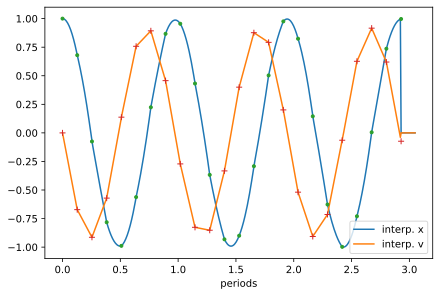

In [22]:
figure()
plot(t_bezier/period, x_bezier, '-', label='interp. x')
plot(t_bezier/period, v_bezier, '-', label='interp. v')
plot(t/period, x, '.')
plot(t/period, v, '+')
xlabel('periods')
legend()